# Overview

![Cinema Art Image](Images/cinema-art.jpg)

   Microsoft wants to create their own original video content as part of their new movie studio. In order to do so, they need to know what types of movies are most successful right now and what it is that is making them so successful. Through analyzing data on a wide range of movies from various sources, this project will show which genres of movies have done the best, whether movies are more likely to be known for having a famous actor/actress, writer, or director, and whether higher production budgets are related to higher profits. This information will not only be able to provide Microsoft with valuable advice about the types of movies that they should focus their efforts on, but also how important it is that they set aside a large production budget for a movie, and whether it is more important to hire a well-known actor/actress, writer, or director in order to get their movie the most attention.


# Business Understanding


![Movie Theatre Image](Images/movie_theater_1400.jpg)

Microsoft may have better chances of success with their new movie venture by creating movies in the genres that are doing well, allocating an appropriate budget to the project, and hiring a well known director to attract people to watch their movies. 


# Data Understanding

The data is sourced from [This GitHub Repository](https://github.com/learn-co-curriculum/dsc-project-template/tree/template-mvp/zippedData). You can clone this repository down, rename the "zippedData" folder to "Data". Place it in the root directory of this repo.

The measure of success I used for movies in this project is profit (production budget subtracted from worldwide gross). I felt that this would be the best way to show which movies were popular amongst the general public as opposed to just movie critics, as ratings would show.


I utilized data from three sources. The dataset from IMDB in the form of an SQL database contained many different tables, I used the ones called movie_basics, which contained the basic information of all the movies in the database, known_for, which showed the people that each movie was known for by their person_id, and persons, which provided the names and primary professions for each person that a movie was known for. The dataset from TheMovieDB provided information for a large number of movies, including their genre codes. The dataset from The Numbers provided the production budgets and worldwide gross for movies, which I then used to calculate profit.

In [193]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### IMDB data:

In [194]:
# Here you run your code to explore the data
import sqlite3
conn = sqlite3.connect("Data/im.db")

##### DataFrame created from relevant IMDB data tables:

By creating a datframe from the necessary tables, the data will be able to be used along with the other datasets to form conclusions.

In [195]:
imdb_df = pd.read_sql_query("""
                            SELECT 
                                mb.movie_id,
                                mb.primary_title, 
                                mb.genres, 
                                kf.person_id, 
                                p.primary_name,
                                p.primary_profession
                            FROM movie_basics mb
                            JOIN known_for kf
                                USING(movie_id)
                            JOIN persons p
                                USING(person_id)
                            ;
                         
                            """, conn)
imdb_df

,movie_id,primary_title,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...
791001,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272490,Angela Gurgel,"director,writer"
791002,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272491,Ana Célia de Oliveira,"producer,director,writer"
791003,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272748,Cristiano Freitas,"cinematographer,camera_department"
791004,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9275317,Fábio Ferraz,cinematographer


##### The Numbers movie data:

This dataset contains colums with each movies release date, title, production budget, domestic gross, and worldwide gross, along with an id number assigned to each movie.

In [196]:
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [197]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [198]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

###### TheMovieDB data:

This dataset contains columns with each movie's genre ids, id number, original language, original title, popularity, release date, title, vote average, and vote count.

In [199]:
tmdb_movies = pd.read_csv("Data/tmdb.movies.csv")
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [200]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [201]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data Preparation

###### Preparing the data to compare the production budget of movies to the profit:

For data representing money, I removed the dollar signs and commas within the values and converted them into integers to be able to work with them and perform analyses with them more easily later on. 

In [202]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(int)

In [203]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [204]:
tn_movie_budgets.drop(columns=["domestic_gross"], inplace=True)

In [205]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


### Feature Engineering

I created a profit feature that represents the total worldwide gross value for a movie, minus its initial budget to see how profitable the movie was overall. Then, I dropped any unnecessary columns.

In [206]:
tn_movie_budgets['profit'] = tn_movie_budgets.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747


In [207]:
tn_movie_budgets.drop(columns=["worldwide_gross"], inplace=True)


###### Preparing the data to see which movie genres profited the highest:

I joined together the dataframes from the TN data and the TMDB data in order to compare movies that were in both datasets to their respective profits to gauge how successful they were.

In [208]:
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie':'Movie_Title'})
tmdb_movies = tmdb_movies.rename(columns={'title':'Movie_Title'})

df_tmdb_join = tmdb_movies.copy()
df_tn_join = tn_movie_budgets.copy()

In [210]:
joined_frame = df_tn_join.merge(df_tmdb_join, on='Movie_Title', how='inner')


joined_frame

,id_x,release_date_x,Movie_Title,production_budget,profit,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,355945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000,464792,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,51,"Apr 21, 2015",Ten,25000,-25000,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000,-22000,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000,-20000,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [211]:
joined_frame["genre_ids"][0]

'[28, 12, 14, 878]'

In [212]:
joined_frame.head()

,id_x,release_date_x,Movie_Title,production_budget,profit,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,355945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


A new dataframe was then created using only the necessary columns for this analysis. In order to get the data for the highest profiting movie genres, I first removed any commas or square brackets in the genre ids column to list them separately.

In [321]:
new_df = joined_frame[['Movie_Title', 'genre_ids', 'profit']]

In [322]:
new_df['genre_ids']=new_df['genre_ids'].str.replace("]","").str.replace("[","").str.replace(",","").str.split(" ")


<ipython-input-322-cf87c0bcdb39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['genre_ids']=new_df['genre_ids'].str.replace("]","").str.replace("[","").str.replace(",","").str.split(" ").copy()


In [323]:
new_df['genre_ids'][0]

['28', '12', '14', '878']

In [231]:
new_df = new_df.explode('genre_ids')
new_df

,Movie_Title,genre_ids,profit
0,Avatar,28,2351345279
0,Avatar,12,2351345279
0,Avatar,14,2351345279
0,Avatar,878,2351345279
1,Pirates of the Caribbean: On Stranger Tides,12,635063875
...,...,...,...
2382,Dry Spell,10749,-22000
2383,All Superheroes Must Die,878,-20000
2383,All Superheroes Must Die,53,-20000
2384,Newlyweds,35,-4416


A dictionary was created to match each genre id with its corresponding genre name, which then replaced the genre ids in the dataframe through a for loop.

In [232]:
genre_ids = {
    'Action': '28',
    'Adventure': '12',
    'Animation': '16',
    'Comedy': '35',
    'Crime': '80',
    'Documentary': '99',
    'Drama': '18',
    'Family': '10751',
    'Fantasy': '14',
    'History': '36',
    'Horror': '27',
    'Music': '10402',
    'Mystery': '9648',
    'Romance': '10749',
    'ScienceFiction': '878',
    'TVMovie': '10770',
    'Thriller': '53',
    'War': '10752',
    'Western': '37'
}

In [233]:
for key, value in genre_ids.items():
    new_df['genre_ids'] = new_df['genre_ids'].replace(value, key)

In [234]:
new_df


,Movie_Title,genre_ids,profit
0,Avatar,Action,2351345279
0,Avatar,Adventure,2351345279
0,Avatar,Fantasy,2351345279
0,Avatar,ScienceFiction,2351345279
1,Pirates of the Caribbean: On Stranger Tides,Adventure,635063875
...,...,...,...
2382,Dry Spell,Romance,-22000
2383,All Superheroes Must Die,ScienceFiction,-20000
2383,All Superheroes Must Die,Thriller,-20000
2384,Newlyweds,Comedy,-4416


###### Preparing the data to see which people more movies are known for:

To determine if it was more common for a movie to be known for an actor/actress, a writer, or a director, I limited the data to only include people known for that were of those four primary professions.

In [110]:
imdb_known_by = pd.DataFrame([imdb_df.primary_title, imdb_df.primary_name, imdb_df.primary_profession]).transpose()
imdb_known_by

,primary_title,primary_name,primary_profession
0,Sunghursh,Mahasweta Devi,writer
1,Sunghursh,Anjana Rawail,"writer,costume_designer"
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
3,The Other Side of the Wind,Oja Kodar,"actress,writer,director"
4,The Other Side of the Wind,Leslie Moonves,"actor,executive,producer"
...,...,...,...
791001,Chico Albuquerque - Revelações,Angela Gurgel,"director,writer"
791002,Chico Albuquerque - Revelações,Ana Célia de Oliveira,"producer,director,writer"
791003,Chico Albuquerque - Revelações,Cristiano Freitas,"cinematographer,camera_department"
791004,Chico Albuquerque - Revelações,Fábio Ferraz,cinematographer


In [111]:
imdb_known_by.rename(columns={'primary_title' : 'Movie_Title'}, inplace=True)
imdb_known_by.rename(columns={'primary_name' : 'Person_Known_For'}, inplace=True)
imdb_known_by = imdb_known_by.drop_duplicates(subset = ['Movie_Title'])
imdb_known_by

,Movie_Title,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
15,Sabse Bada Sukh,Kumud Damle,actress
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
...,...,...,...
790988,Kuambil Lagi Hatiku,Keinaya Meissi Gusti,None
790989,Rodolpho Teóphilo - O Legado de um Pioneiro,Janaína Gouveia,"writer,editor,producer"
790996,Dankyavar Danka,Suvarna Kale,actress
790997,6 Gunn,Pranav Raorane,actor


After the duplicate columns were removed from the data and the columns were named more appropriately, three new dataframes were created to show the number of people for each primary profession that movies were known for.

In [112]:
knownfor_actor = imdb_known_by[imdb_known_by['primary_profession'].str.contains("actor", "actress", na = False)]
knownfor_actor

,Movie_Title,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
25,Joe Finds Grace,C. Ernst Harth,"actor,producer,soundtrack"
43,So Much for Justice!,Mirko Roggenbock,actor
...,...,...,...
790960,The Holden Family Plan,Joshua Bootz,actor
790967,Wien is 't Hof van Commerce,Flip Kowlier,"composer,actor,soundtrack"
790985,Safeguard,Jens Kristjan,actor
790987,The Secret of China,Wang Peng Kai,actor


In [113]:
knownfor_writer = imdb_known_by[imdb_known_by['primary_profession'].str.contains("writer", na = False)]
knownfor_writer

,Movie_Title,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790940,De Beentjes van Sint Hildegard,Herman Finkers,"actor,writer,composer"
790957,Sokagin Çocuklari,Kasim Uçkan,writer
790980,Vida em Movimento,Selma Perez,"writer,editor"
790983,The Last White Witch,Ryuho Okawa,"writer,producer,executive"


In [114]:
knownfor_director = imdb_known_by[imdb_known_by['primary_profession'].str.contains("director", na = False)]
knownfor_director

,Movie_Title,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
29,O Silêncio,José Manuel Alves Pereira,"editor,director,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790913,Ximei,Gaylen Ross,"director,producer,writer"
790916,Razreshite tebya potselovat... Otets nevesty,Yuriy Morozov,"director,actor,writer"
790922,Hellbiro,Evann Rodriguez,"director,actor,writer"
790946,Swarm Season,Sarah Christman,"miscellaneous,director,editor"


# Exploratory Data Analysis

Of the movies in the IMDB database that were known for either an actor/actress, writer, or director, they were most often known for a director, and least often known for an actor or actress.

Text(0.5, 1.0, 'Who are different movies known for?')

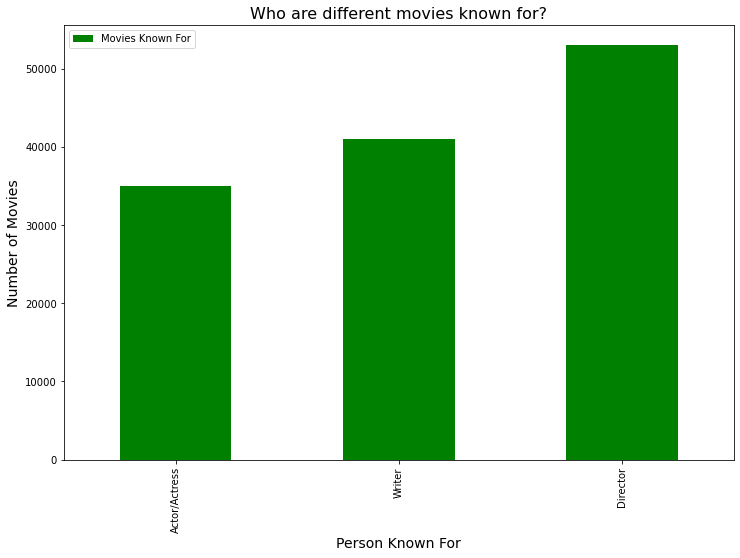

In [115]:
knownby_df = pd.DataFrame({"Movies Known For":[35023, 40991, 52977]}, 
                  index = ["Actor/Actress", "Writer", "Director"])
knownby_df.plot(kind="bar", figsize=(12,8), color="green")
plt.xlabel("Person Known For", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14) 
plt.title("Who are different movies known for?", fontsize=16)

For the movies in the TN database, the majority of movies still had a low budget (less than 100,000,000 dollars) and a low profit (less than 500,000,000 dollars). However, the ones that had a higher budget did also earn higher profits on average.

Text(0.5, 1.0, 'Movie Budgets vs. Profits')

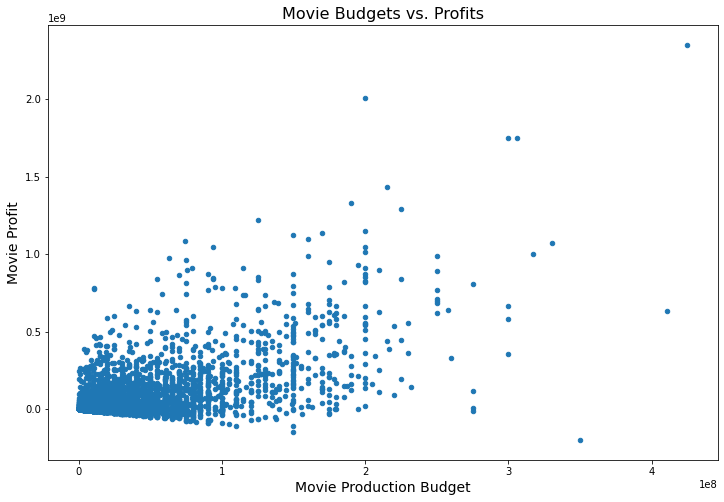

In [86]:
tn_movie_budgets.plot(
    'production_budget', 'profit', 
    kind='scatter', 
    figsize=(12,8), 
   
    )
plt.xlabel("Movie Production Budget", fontsize=14)
plt.ylabel("Movie Profit", fontsize=14)
plt.title("Movie Budgets vs. Profits", fontsize=16) 



Out of all of the movies that were in both the TN and TMDB databases, the top five movie genres that received the highest profits were action, adventure, comedy, drama, and fantasy.

In [239]:
sorted_df = new_df.groupby('genre_ids')['profit'].sum().sort_values(ascending=False)

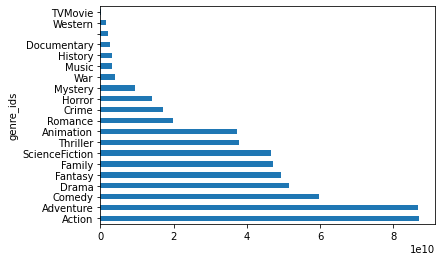

In [241]:
sorted_df.plot(kind='barh');

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter;

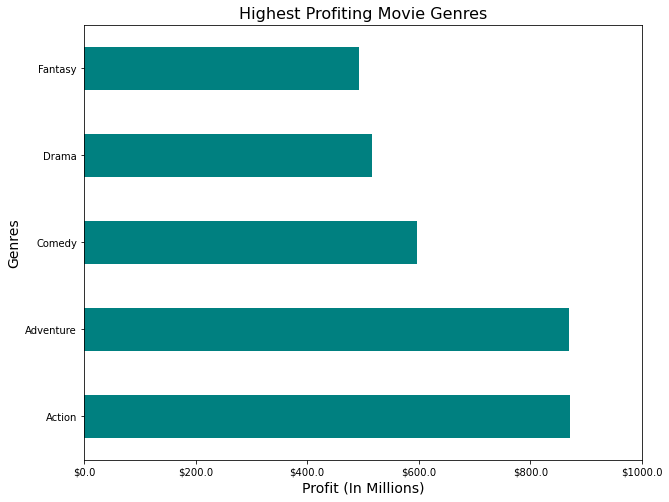

In [318]:
#experimenting to get rid of scientific numbers
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

top_5_genres_profit = new_df.groupby('genre_ids')['profit'].sum().sort_values(ascending=False).nlargest(5)
top_5_genres_profit.plot(kind='barh', figsize=(10,8), color="teal")
plt.title('Highest Profiting Movie Genres', fontsize=16)
plt.xlabel('Profit (In Millions)', fontsize=14)
plt.ylabel('Genres', fontsize=14)

locs,labels = xticks()
xticks(locs, map(lambda x: "$%.1f" % x, locs*1e-8));


# Conclusions & Recommendations

Based on the analysis of the data examined in this project, in order to have the best chances of success in their new movie endeavor, Microsoft should:
- Focus on creating movies that are in the action, adventure, comedy, drama, and fantasy genres (or a combination)
- Allocate an appropriate production budget to their movies, ideally greater than $50,000,000
- Focus some of the budget on hiring a well-known director to attract more attention to the movie



![Movie Take Image](Images/pexels.jpg)

## Limitations

- The table in the IMDB database for the person that movies were known for contained individuals of many different primary professions. 
- There are many factors that go into whether or not a movie is successful. In addition to the ones investigated in this project, there is how long the movie ran for, how many countries it was shown in, and many more. While the results of this analysis did show a relationship between both a higher production budget and certain genres with a higher profit, this does not mean that the higher profit was caused by either of those things. 
- These analyses did not limit the datasets in terms of time. Some of these movies date back to 2010, etc. Data that was on movies only from more recent years may provide a better idea of the current trends.



## Next Steps

There are many more aspects that could be explored in order to provide additional insights to Microsoft for how they can make their new movie studio as successful as possible.

- Compare these same factors across the different datasets (i.e. do the movies in imdb have the same most profitable genres at the ones in the other datasets?
- Explore the other features of the data, such as how long the movies showed for in theatres, the region(s) they were released in, and more.
- The data used for this project is from a many-year time span. To show more current trends specifically, further analysis could compare same factors for only recent years (i.e. the last 5 years) to see if the trends change any in recent years.